# Downloading tiles from a WMTS

Author: Cor Zuurmond 

---

This notebook explains how to download tiles from a WMTS given a location (coordinate). 

We use the [aerial imagery WMTS](https://geodata.nationaalgeoregister.nl/luchtfoto/rgb/wmts?request=GetCapabilities&service=wmts) from PDOK. PDOK contains Dutch open data.

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from IPython.display import Image

import open_data.wmts

In [3]:
# WMTS
wmts_base = 'https://geodata.nationaalgeoregister.nl/luchtfoto/rgb/wmts'
layer = 'Actueel_ortho25'

# Coordinate to request
amsterdam = 52.3522554, 4.9130319

In [4]:
zoom = 12
tile_col, tile_row = open_data.wmts.gps_to_tile(*amsterdam, zoom=zoom)
tile_col, tile_row

(2103, 1346)

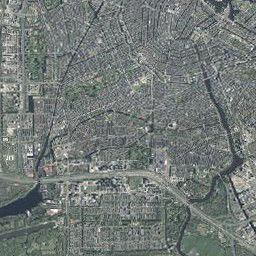

In [5]:
open_data.wmts.get_wmts_tile_from_coordinate(amsterdam, wmts_base, layer, zoom=12)

In [6]:
# Create a gif that zooms in on Amsterdam
images = [open_data.wmts.get_wmts_tile_from_coordinate(amsterdam, wmts_base, layer, zoom=zoom) for zoom in range(6, 20)]
images[0].save(
    'static/zooming_amsterdam.gif', 
    format='GIF', 
    append_images=images[1:], 
    save_all=True, 
    duration=500, 
    loop=0
)

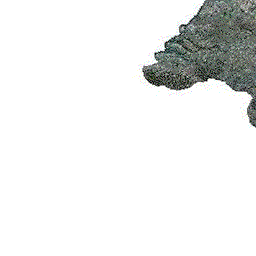

In [8]:
# Note that the zoom is not similar as Google maps -  it does not feel "natural". 
# On every zoom level the tile is requested that contains the coordinate, which
# makes the zoom jumpy

Image('static/zooming_amsterdam.gif')